# **Assignment 6: Knock Airport Weather**

  
-   plot temperature
-   mean temperature each day
-   mean temperature each month
-   windspeed
-   rolling windspeed (24hours)
-   the max windspeed each day
-   monthly mean of the daily max windspeeds

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
#warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, header=0, low_memory=False)

df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [3]:
df['date']


0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
248389    30-nov-2024 20:00
248390    30-nov-2024 21:00
248391    30-nov-2024 22:00
248392    30-nov-2024 23:00
248393    01-dec-2024 00:00
Name: date, Length: 248394, dtype: object

In [4]:
# drop first row due to inconsistency in data
df.drop(df.index[0], inplace=True)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8


In [5]:
df_columns =df[['temp', 'wdsp']]
df_columns

,temp,wdsp
1,11.5,0
2,11.6,0
3,12.9,0
4,14.5,0
5,14.4,0
...,...,...
248389,11.6,17
248390,11.4,16
248391,10.9,15
248392,10.8,14


In [6]:
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [7]:
# change temp and wdsp to numeric data type
#df['temp']=pd.to_numeric(df['temp'], errors='coerce') 
df['wdsp']=pd.to_numeric(df['wdsp'], errors='coerce') # coerce gives NA values for non numeric data in the  wdsp column.

# change all columns to numeric data type 
#df = df.apply(pd.to_numeric, errors='coerce')


df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp     float64
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [8]:
# datetime conversion
df['date'] = pd.to_datetime(df['date'])

C:\Users\louis\AppData\Local\Temp\ipykernel_25408\2286976744.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [9]:
df.isna().sum()

date      0
ind       0
rain      0
ind.1     0
temp      0
ind.2     0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
ind.3     0
wdsp     50
ind.4     0
wddir     0
ww        0
w         0
sun       0
vis       0
clht      0
clamt     0
dtype: int64

In [10]:
# drop rows with missing values 
df.dropna(inplace=True)


In [11]:
df.isna().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [12]:
df.dtypes

date     datetime64[ns]
ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp            float64
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
dtype: object

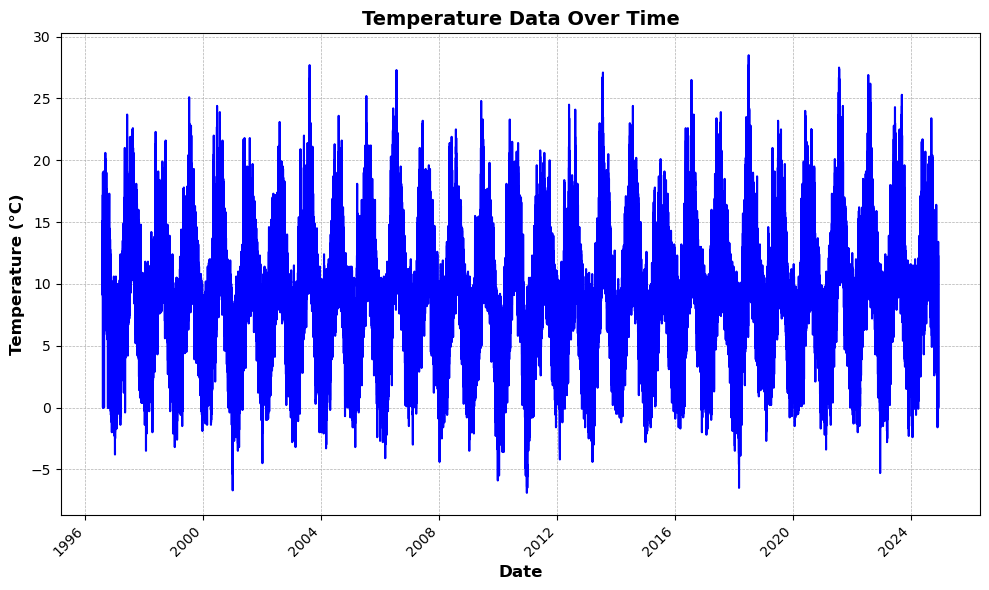

In [13]:

# Plot temperature data

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['date'], df['temp'], color='blue', label='Temperature')  # Line plot
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_title('Temperature Data Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


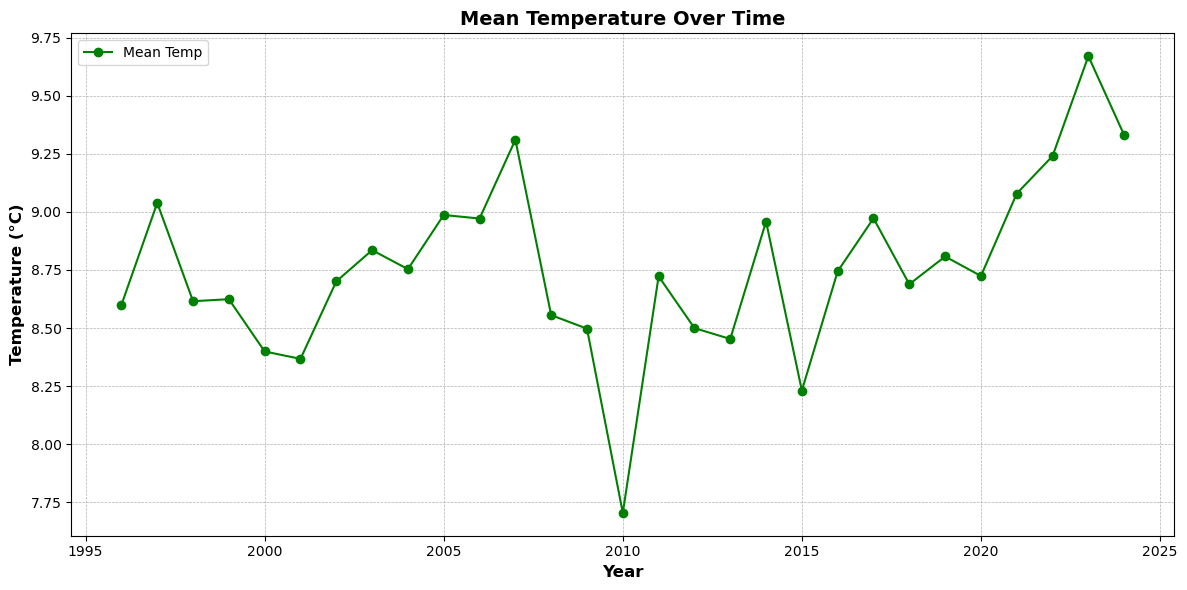

In [14]:
# plot mean temperature for each year
fig, ax = plt.subplots(figsize=(12, 6))

df_mean_temp = df.groupby(df['date'].dt.year)['temp'].mean()

ax.plot(df_mean_temp.index, df_mean_temp.values, label='Mean Temp', marker='o', color='g')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_title('Mean Temperature Over Time', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='upper left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

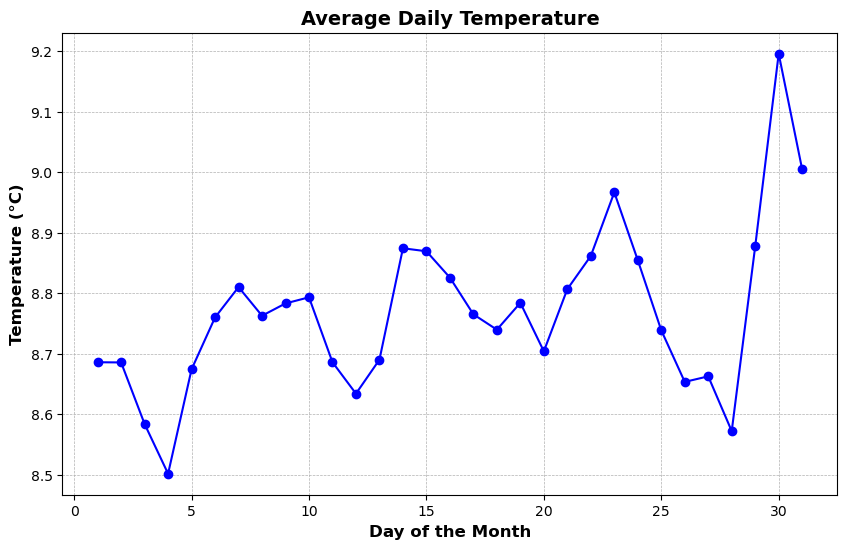

In [15]:

# Plot the daily mean temperature for each day of the month

daily_mean_temp=df.groupby(df['date'].dt.day)['temp'].mean()


fig, ax = plt.subplots(figsize=(10, 6))
daily_mean_temp.plot(ax=ax, marker='o', color='blue')
ax.set_title('Average Daily Temperature', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of the Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [16]:
# calculate daily mean temperature

daily_mean_temp=df.groupby(df['date'].dt.day)['temp'].mean()
print(daily_mean_temp)


date
1     8.685662
2     8.685343
3     8.583578
4     8.501336
5     8.673983
6     8.759755
7     8.809939
8     8.762574
9     8.782929
10    8.793051
11    8.685711
12    8.633725
13    8.689902
14    8.874117
15    8.869171
16    8.825632
17    8.764909
18    8.739485
19    8.783909
20    8.703750
21    8.806544
22    8.861446
23    8.966597
24    8.854406
25    8.738493
26    8.653175
27    8.662351
28    8.571789
29    8.877312
30    9.195806
31    9.004509
Name: temp, dtype: float64


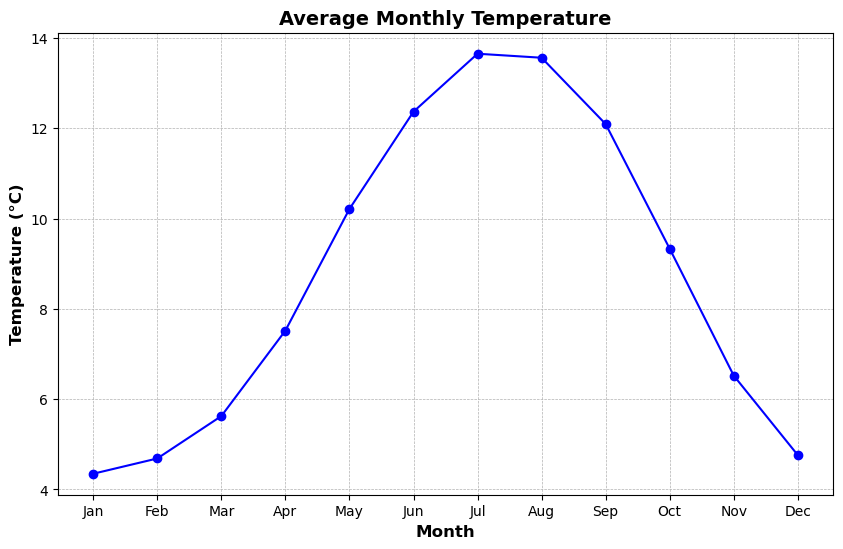

In [17]:
# plot the mean monthly temperature


months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group by month and calculate the mean temperature
monthly_mean_temp = df.groupby(df['date'].dt.month)['temp'].mean()

# Plot the monthly mean temperature
monthly_mean_temp.plot(figsize=(10, 6), marker='o', color='blue')
plt.title('Average Monthly Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.xticks(monthly_mean_temp.index, labels=months)
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()








In [18]:
# calculate mean monthly temperature

monthly_mean_temp = df.groupby(df['date'].dt.month)['temp'].mean()
monthly_mean_temp

date
1      4.348502
2      4.686452
3      5.625178
4      7.518934
5     10.212284
6     12.366806
7     13.650432
8     13.561395
9     12.092413
10     9.331425
11     6.521247
12     4.760255
Name: temp, dtype: float64

### **Windspeed:**

In [19]:
# change dtypes of all columns to numeric 
df = df.apply(pd.to_numeric, errors='coerce')
df.dtypes


date       int64
ind        int64
rain     float64
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl      float64
ind.3      int64
wdsp     float64
ind.4      int64
wddir    float64
ww       float64
w        float64
sun      float64
vis      float64
clht     float64
clamt    float64
dtype: object

In [20]:
df.isna().sum()

date         0
ind          0
rain         3
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp         0
ind.4        0
wddir        2
ww       55486
w        55487
sun          0
vis      62581
clht        18
clamt       18
dtype: int64

In [21]:
# remove NaN values from the wdsp column 
df.dropna(subset=['wdsp'], inplace=True)
df.isna().sum()






date         0
ind          0
rain         3
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp         0
ind.4        0
wddir        2
ww       55486
w        55487
sun          0
vis      62581
clht        18
clamt       18
dtype: int64

In [23]:
# convert to datetime
#df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H%M%S', errors='coerce')

#df['date'] = pd.to_datetime(df['date'])



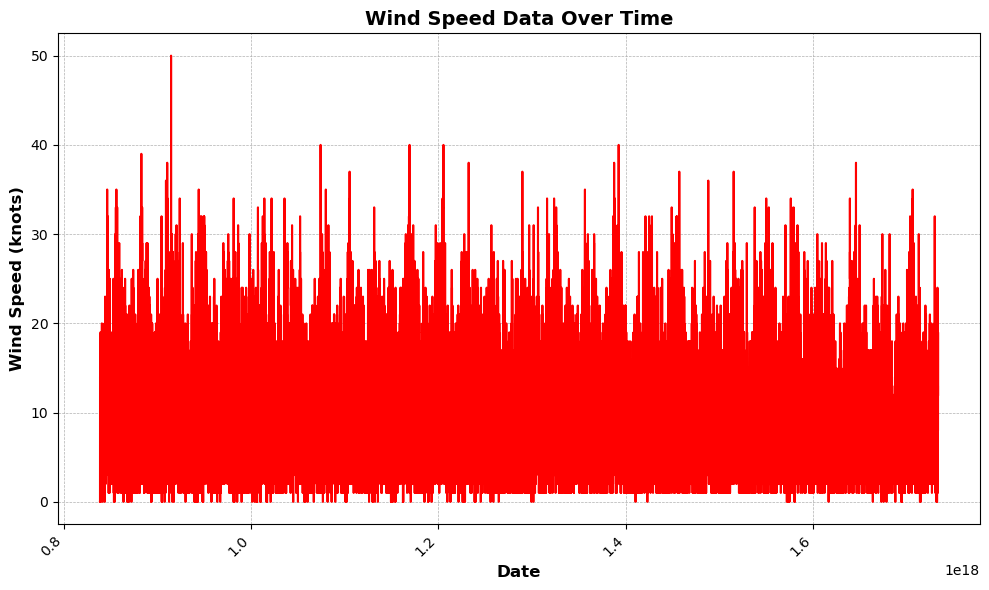

In [24]:
# plot wdsp data 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['date'], df['wdsp'], color='red', label='Wind Speed')  # Line plot
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
ax.set_title('Wind Speed Data Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

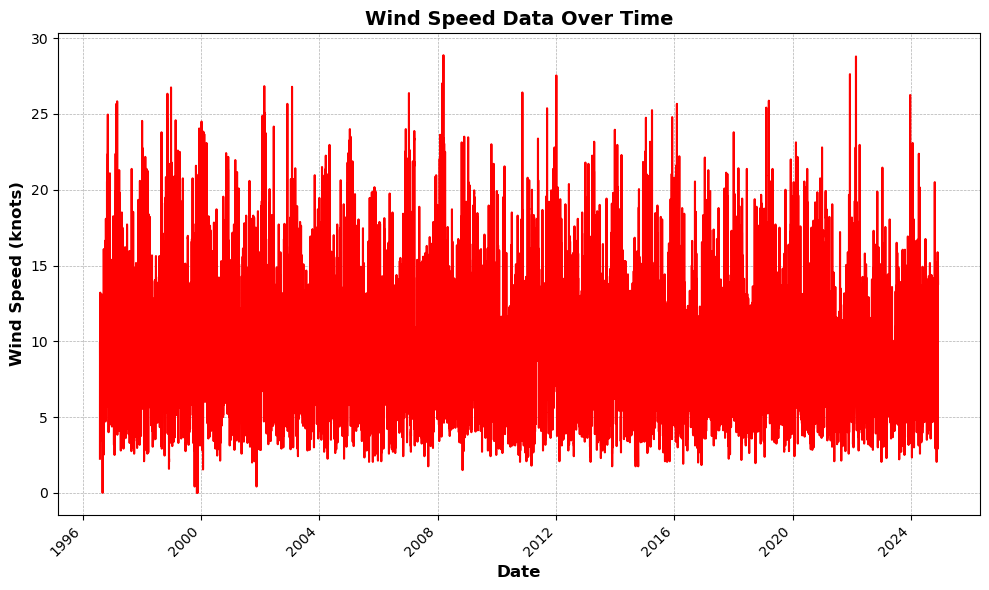

In [ ]:
# rolling mean of wind speed over 24 hours 
df['wdsp_rolling'] = df['wdsp'].rolling(window=24).mean()
df['wdsp_rolling']

# rolling mean of wind speed over 24 hours for 10 per cent of the data
df['wdsp_rolling'] = df['wdsp'].rolling(window=int(len(df)*0.1)).mean()
df['wdsp_rolling']


# rolling mean for wind speed over 24 hours for half the years in the data 
df['wdsp_rolling'] = df['wdsp'].rolling(window=int(len(df)/2)).mean()
df['wdsp_rolling']

# rolling mean for wind speed over 24 hours 
df['wdsp_rolling'] = df['wdsp'].rolling(window=24).mean()
df['wdsp_rolling']

# plot the rolling mean of wind speed

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['date'], df['wdsp_rolling'], color='red', label='Wind Speed')  # Line plot
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
ax.set_title('Wind Speed Data Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()




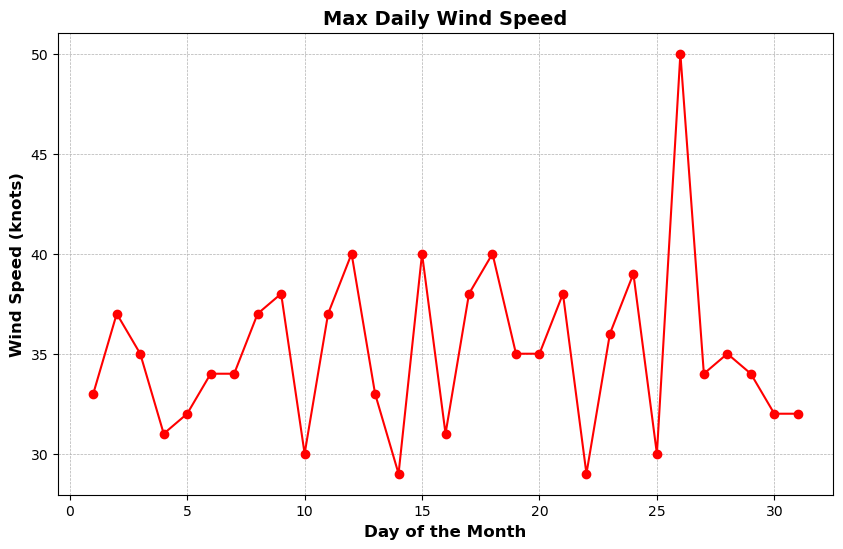

date
1     33.0
2     37.0
3     35.0
4     31.0
5     32.0
6     34.0
7     34.0
8     37.0
9     38.0
10    30.0
11    37.0
12    40.0
13    33.0
14    29.0
15    40.0
16    31.0
17    38.0
18    40.0
19    35.0
20    35.0
21    38.0
22    29.0
23    36.0
24    39.0
25    30.0
26    50.0
27    34.0
28    35.0
29    34.0
30    32.0
31    32.0
Name: wdsp, dtype: float64


In [ ]:
# plot max windspeed per day of the month
daily_max_wdsp=df.groupby(df['date'].dt.day)['wdsp'].max()

fig, ax = plt.subplots(figsize=(10, 6))
daily_max_wdsp.plot(ax=ax, marker='o', color='red')
ax.set_title('Max Daily Wind Speed', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of the Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# calculate daily max wind speed using groupby and max functions
daily_max_wdsp=df.groupby(df['date'].dt.day)['wdsp'].max()
print(daily_max_wdsp)

C:\Users\louis\AppData\Local\Temp\ipykernel_14744\1630663456.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['rolling_wdsp'] = df['wdsp'].rolling(window='24H').mean()


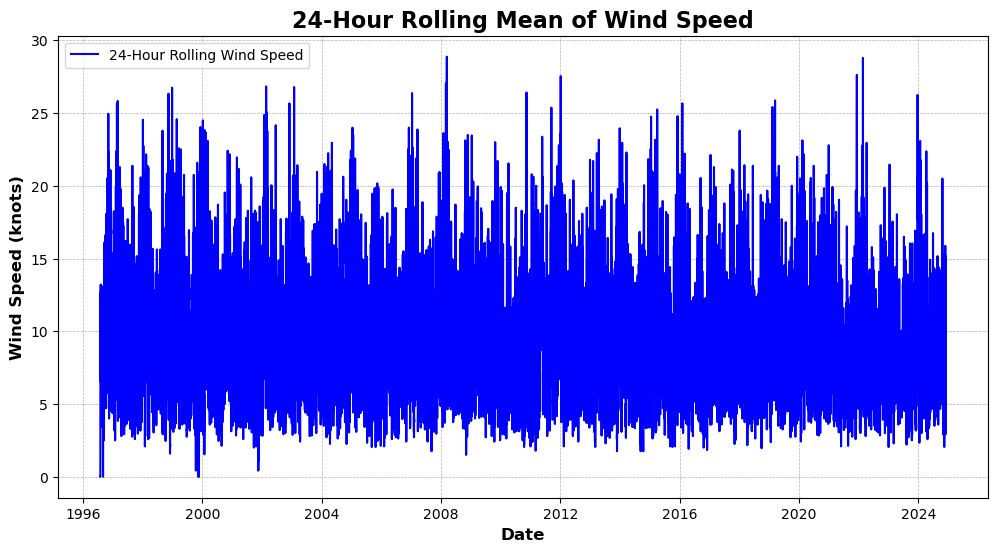

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has 'date' and 'wdsp' columns, and 'date' is already in datetime format
# If not, make sure to convert the 'date' column to datetime:
# df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Calculate the rolling mean of wind speed over a 24-hour window
# You can adjust this to rolling sum or other methods if needed
df['rolling_wdsp'] = df['wdsp'].rolling(window='24H').mean()

# Plot the rolling windspeed over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_wdsp'], label='24-Hour Rolling Wind Speed', color='blue')

# Add labels and title
plt.title('24-Hour Rolling Mean of Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


C:\Users\louis\AppData\Local\Temp\ipykernel_14744\1128465551.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['rolling_wdsp'] = df['wdsp'].rolling(window='24H').mean()


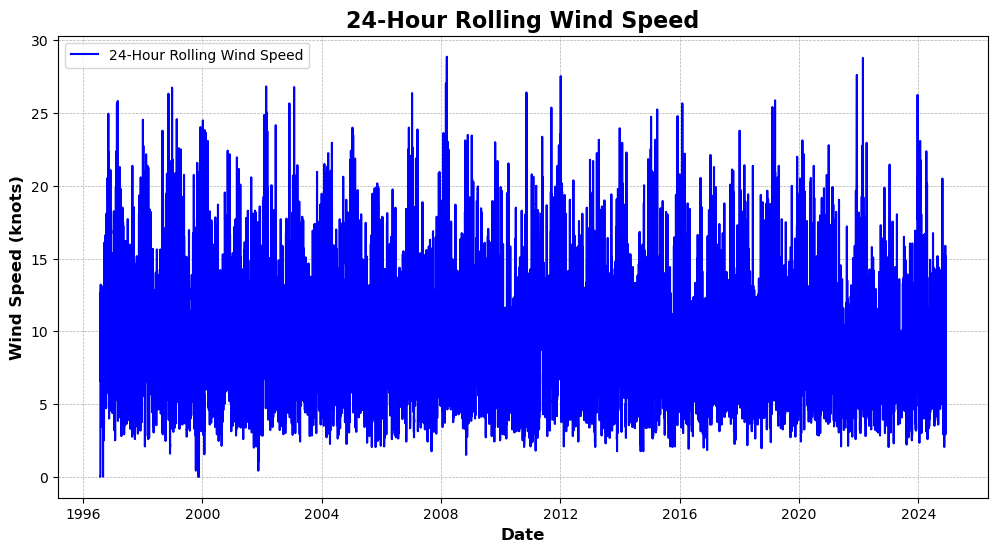

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df['date'] is already a datetime column and is set as the index
# If not, use the following to convert 'date' to datetime and set it as index
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# Calculate the 24-hour rolling mean wind speed without resampling
df['rolling_wdsp'] = df['wdsp'].rolling(window='24H').mean()

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_wdsp'], label='24-Hour Rolling Wind Speed', color='blue')
plt.title('24-Hour Rolling Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


The maximum montly windspeed shows the maximum windspeed each month. The highest value from the entire month. 

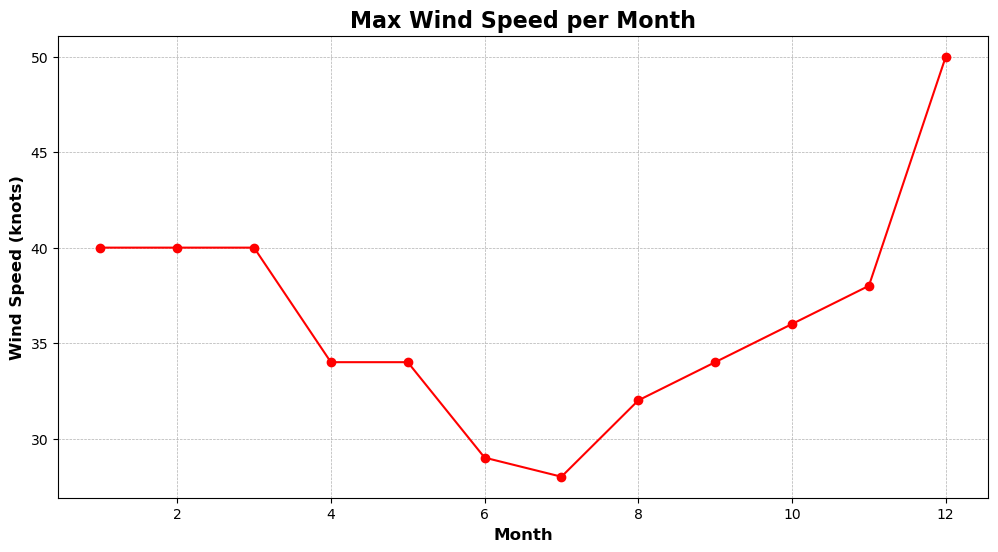

In [29]:
# plot max windspeed per month
monthly_max_wdsp = df.groupby(df.index.month)['wdsp'].max()

plt.figure(figsize=(12, 6))
plt.plot(monthly_max_wdsp.index, monthly_max_wdsp.values, marker='o', color='red')
plt.title('Max Wind Speed per Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (knots)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

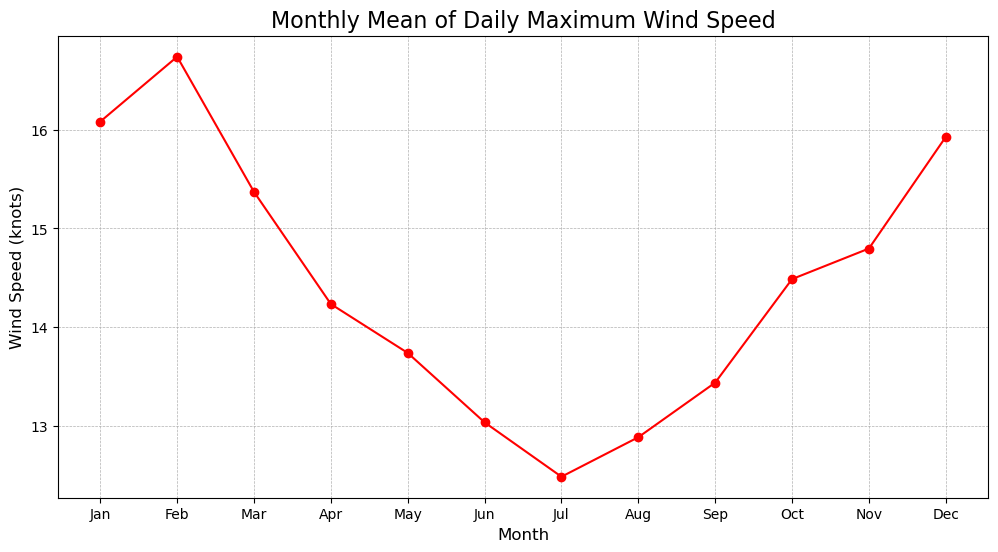

In [27]:
# plot monthly mean of daily max wind speed

# Convert 'date' to datetime 
df['date'] = pd.to_datetime(df['date'])

# Step 1: Group by 'date' to get the daily maximum wind speed
daily_max_wdsp = df.groupby(df['date'].dt.date)['wdsp'].max() # Group by date and get the max wind speed for each day 

# Step 2: Group by month and calculate the mean of daily max wind speeds
# We can use the .dt.month attribute to group by month, and then calculate the mean
monthly_mean_wdsp = daily_max_wdsp.groupby(daily_max_wdsp.index.to_series().apply(lambda x: x.month)).mean() #lambda function to extract month from date

# Step 3: Plot the monthly mean of the daily max wind speed
plt.figure(figsize=(12, 6))
monthly_mean_wdsp.plot(marker='o', color='red')
plt.title('Monthly Mean of Daily Maximum Wind Speed', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Wind Speed (knots)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Customize the x-axis to show month names
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()


The monthly mean of daily max windspeeds shows the average of the daily highest windspeeds for each month. The maximum windspeed is taken each day and the average of these is then taken across each month. 

#### References:

-   https://pandas.pydata.org/docs/user_guide/10min.html
-   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
-   https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.plot.html
-   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
-   https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/


Pandas’ time-based functions (like resample(), groupby(), and extracting months, days, etc.) work only on columns that are in datetime format. If your date column is in string format or any other format, pandas won’t be able to perform these time-based operations without converting it first.

Handling missing or invalid dates: The errors='coerce' argument is useful because it safely handles any invalid dates by turning them into NaT (which won't cause issues in the resampling process).